# UCD ECO Python Tools - Tutorial

In [1]:
import pandas as pd
import os
import requests as req
import json
import numpy as np
import datetime

from matplotlib import style
import matplotlib
%matplotlib inline
style.use('ggplot')

#  new modules - marco.pritoni@gmail.com
from PIPy_Datalink import *
from Data_Preprocessor import *
# note for Students: these are probably PIPy_Datalink2 and Data_Preprocessor2 for you

## PIPy datalink - Python implementation

In [2]:
p=pipy_datalink()

<Response [200]>
<Response [200]>


,UnknownName
2016-01-22 08:00:00,1129.0
2016-01-22 09:00:00,1092.0
2016-01-22 10:00:00,1109.0
2016-01-22 11:00:00,1112.0
2016-01-22 12:00:00,1133.0


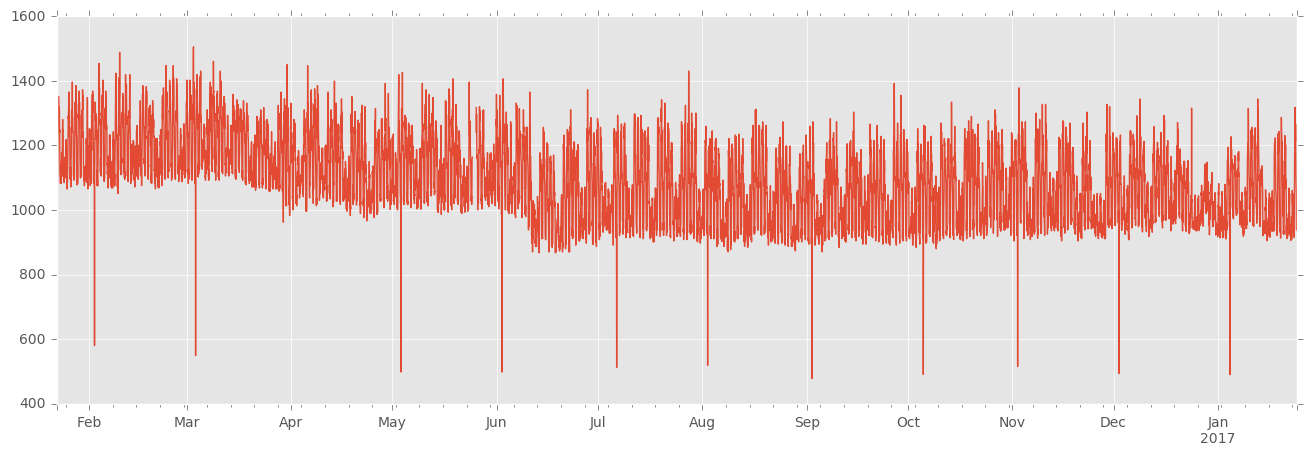

In [3]:
## method get_stream()
## get the stream by WebID
## input: Web ID
## 
## output: pandas DataFrame/dictionary
##
## arguments: 
## Web_ID=None : - the unique identifier of the time series 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 

Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24", _label="UnknownName").plot(figsize=(16,5), legend=False)
p.get_stream(Web_ID,_start="2016-01-22", _end="2017-01-24",_label="UnknownName").head()

In [4]:
## example using the _calculation="summary"
Web_ID="A0EbgZy4oKQ9kiBiZJTW7eugwNFN9S7KS5BG0-xgDcyrprwDXFgAtlASVonZNgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFBMQU5UICYgRU5WSVJPTk1FTlRBTCBTQ0lFTkNFU1xFTEVDVFJJQ0lUWXxERU1BTkRfS0JUVQ"

# plot and show results
p.get_stream(Web_ID,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

<Response [200]>


,UnknownName
Count,172800.000000
PopulationStdDev,112.734120
PercentGood,100.000000
Average,1021.991123
Maximum,1381.517456
Range,503.370850
Minimum,878.146606
StdDev,112.734120
Total,2043.982246


<Response [200]>


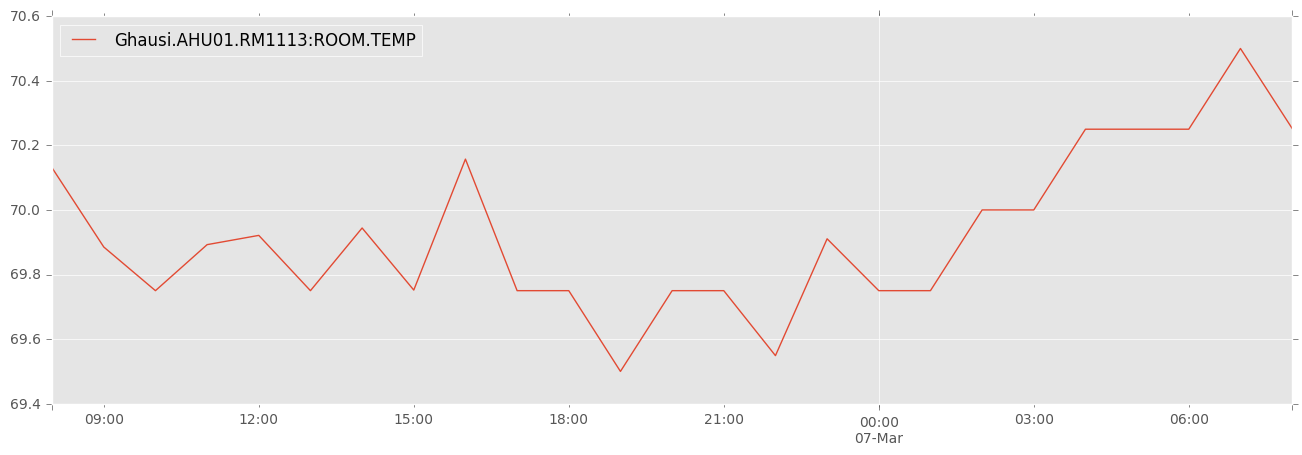

In [5]:
## get_stream_by_point()
##
## getting the data by WebIDs is not pratical
## we want to get the data by data point name 
## 
## input: point name; can use *  
##
## output: pandas DataFrame/dictionary
##
##
## arguments: 
## point_name : - the name is unique in each database 
## _start="y" : - start date, default yesterday "y"; can use different formats as "YYYY-MM-DD";
## _end="t" : - end date, default yesterday "t"; can use different formats as "YYYY-MM-DD";        
## _calculation="interpolated": can use "recorded" to get raw data and summary to get summary data (tot, mean, sd);
## note: summary data is not a time series, but a dictionary
## _interval="1h": interpolation interval, used only with interpolated; default 1 hour
## _controller=None : not used at the moment; needed for future extensions 
#  _sumType=None : used if calculation is "summary", can use All, Total, default Total
#  _label=None : not used at the moment; needed for future extensions 
# dataserver : there can be more databases in a PI environment; default "s09KoOKByvc0-uxyvoTV1UfQVVRJTC1QSS1Q"

point_name="Ghausi.AHU01.RM1113:ROOM.TEMP"

p.get_stream_by_point(point_name).plot(figsize=(16,5))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
2017-03-06 08:00:00,70.130226,69.5
2017-03-06 09:00:00,69.885200,69.5
2017-03-06 10:00:00,69.750000,69.0
2017-03-06 11:00:00,69.892510,69.5
2017-03-06 12:00:00,69.921196,69.5


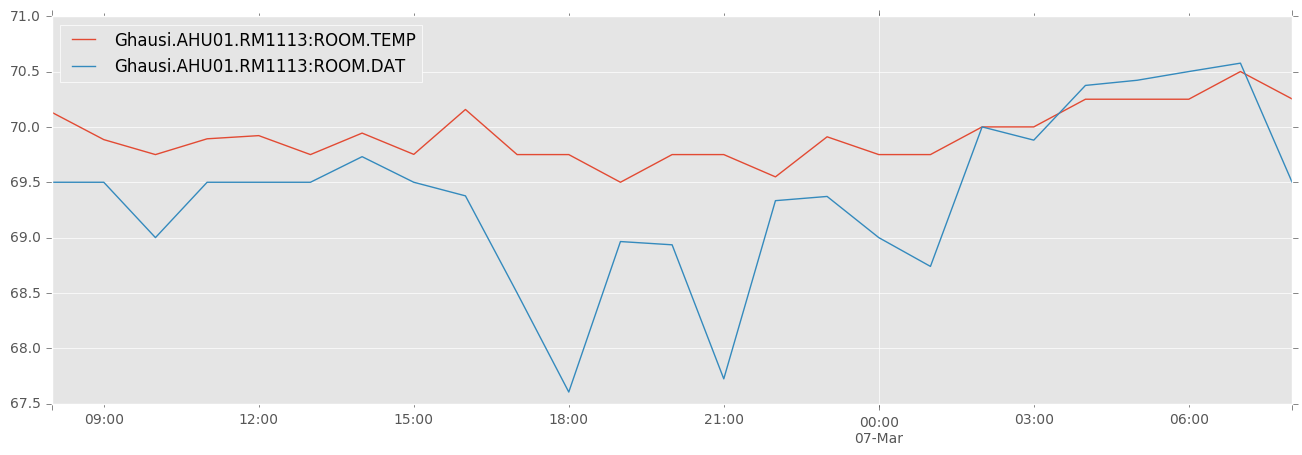

In [6]:
# test the same method with multiple point names

point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm).plot(figsize=(16,5))
p.get_stream_by_point(point_nm).head()

In [7]:
# show that also the summary works for multiple columns
p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="summary",_sumType="All",_label="UnknownName")

<Response [200]>
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Count,172800.000000,172800.000000
PopulationStdDev,0.271145,0.927055
PercentGood,99.967414,99.967414
Average,69.951389,68.914344
Maximum,70.750000,71.000000
Range,1.250000,4.500000
Minimum,69.500000,66.500000
StdDev,0.271145,0.927055
Total,139.902778,137.828688


In [8]:
# test of calculation = _end
point_nm=["Ghausi.AHU01.RM1113:ROOM.TEMP","Ghausi.AHU01.RM1113:ROOM.DAT"]

p.get_stream_by_point(point_nm,_start="2017-01-22", _end="2017-01-24", _calculation="end",_sumType="All",_label="UnknownName")

<Response [200]>
<Response [200]>


,Ghausi.AHU01.RM1113:ROOM.TEMP,Ghausi.AHU01.RM1113:ROOM.DAT
Timestamp,2017-03-07T23:23:11.2820129Z,2017-03-07T23:23:40.6670074Z
Good,True,True
Value,69.5,69


In [9]:
## search_by_point()
## method to search for data points names using * 
##
## output: list of point names and dictionary of point name: WebIDs

l, d = p.search_by_point("OAT")
print l
print d

[u'OAT']
{u'OAT': u'P09KoOKByvc0-uxyvoTV1UfQzo8BAAVVRJTC1QSS1QXE9BVA'}


In [10]:
l, d = p.search_by_path("\\UTIL-AF\CEFS\UCDAVIS\Weather|OAT")
d

<Response [200]>


{u'OAT': u'A0EbgZy4oKQ9kiBiZJTW7eugwvuNJoeTC5hGUXQAVXTB8PA0hb_A-jKzkKp44rKK973OwVVRJTC1BRlxDRUZTXFVDREFWSVNcV0VBVEhFUnxPQVQ'}

<Response [200]>
A0EbgZy4oKQ9kiBiZJTW7eugwvuNJoeTC5hGUXQAVXTB8PA0hb_A-jKzkKp44rKK973OwVVRJTC1BRlxDRUZTXFVDREFWSVNcV0VBVEhFUnxPQVQ
<Response [200]>
<Response [200]>
A0EbgZy4oKQ9kiBiZJTW7eugwS5GAMtE55BGIPhgDcyrprwcrOde7rrSVobodgP17EChQVVRJTC1BRlxDRUZTXFVDREFWSVNcQlVJTERJTkdTXFJJRkxFIFJBTkdFXEVMRUNUUklDSVRZfERFTUFORF9LQlRV
<Response [200]>


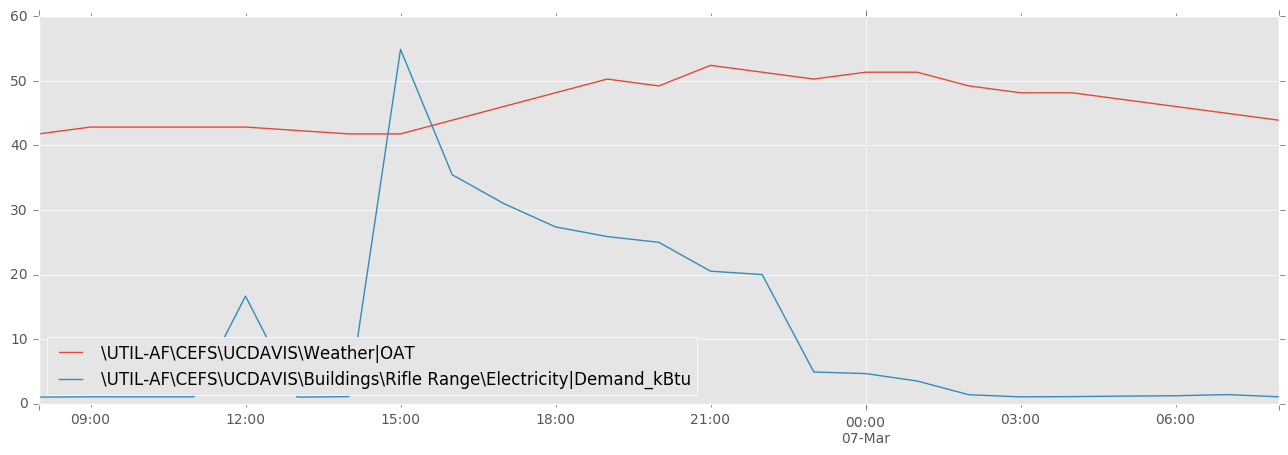

In [11]:
path_name="\\UTIL-AF\CEFS\UCDAVIS\Buildings\Rifle Range\Electricity|Demand_kBtu"

path_name=["\\UTIL-AF\CEFS\UCDAVIS\Weather|OAT","\\UTIL-AF\CEFS\UCDAVIS\Buildings\Rifle Range\Electricity|Demand_kBtu"]

p.get_stream_by_path(path_name,_label="UnknownName").plot(figsize=(16,5))

## Data Pre-Processor (clean and featurize)

In [12]:
# find meters at Ghausi Hall
p.search_by_point("Ghausi*BTU")

([u'Ghausi_ChilledWater_Demand_kBtu',
  u'Ghausi_Electricity_Demand_kBtu',
  u'Ghausi_Steam_Demand_kBtu'],
 {u'Ghausi_ChilledWater_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ1yMAAAVVRJTC1QSS1QXEdIQVVTSV9DSElMTEVEV0FURVJfREVNQU5EX0tCVFU',
  u'Ghausi_Electricity_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQdBkAAAVVRJTC1QSS1QXEdIQVVTSV9FTEVDVFJJQ0lUWV9ERU1BTkRfS0JUVQ',
  u'Ghausi_Steam_Demand_kBtu': u'P09KoOKByvc0-uxyvoTV1UfQ2CMAAAVVRJTC1QSS1QXEdIQVVTSV9TVEVBTV9ERU1BTkRfS0JUVQ'})

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
debugging clean_data
_dataset resampled at 1h
_dataset interpolated with limit of 1 element
_dataset NA removed
_outliers removed
(3985, 4)
(3908, 4)
(0, 0)


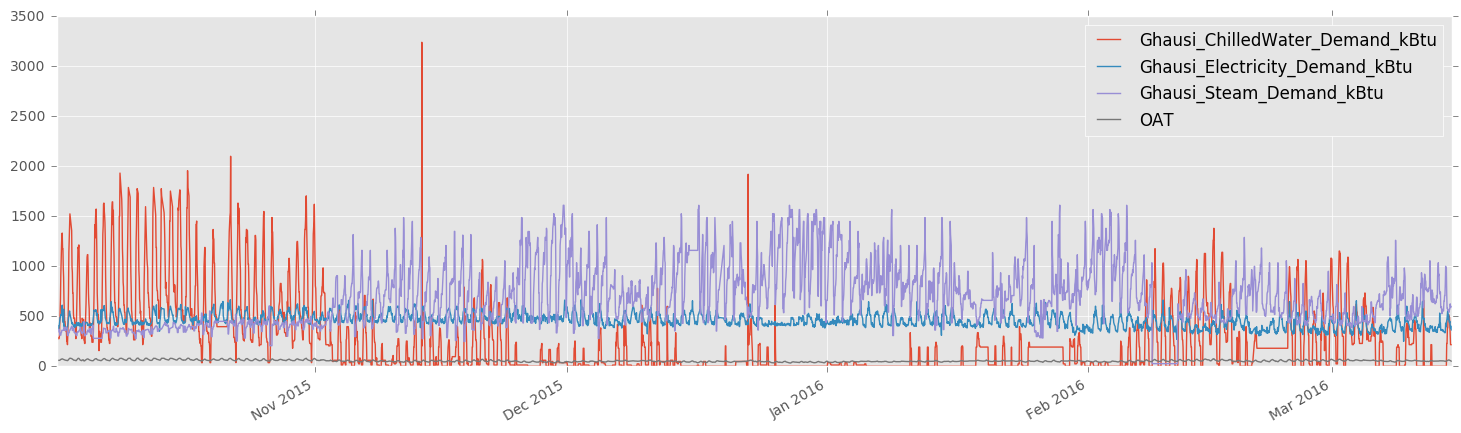

In [13]:
# run the data through data cleaning (can also choose options)
point_names= ['Ghausi_ChilledWater_Demand_kBtu','Ghausi_Electricity_Demand_kBtu','Ghausi_Steam_Demand_kBtu',"OAT"]
dr=p.get_stream_by_point(point_names,_start="2015-10-01", _end="2016-03-15")
dp=data_preprocessor(dr)    

dp.clean_data(      runResample=True,

                    freq="1h",                   

                    runInterpolate=True,

                    limit=1,
                   
                    runRemoveNA=True,
              
                    removeNAhow="any",
                   
                    runRemoveOutliers=True,

                    sd_val=3,
                   
                    runRemoveOutOfBound=False,
                   
                    low_bound=100,
                   
                    high_bound=9998
             )                
                   
tSlicer=(slice(None))
#tSlicer=(slice("2016-01","2016-02-25"))

print dp.data_raw.shape
print dp.data_cleaned.shape
print dp.data_removed.shape

dp.data_cleaned.loc[tSlicer,:].plot(figsize=(18,5))

#dp.data_raw.loc["2015-10-01 08:00:00":"2015-10-01 10:00:00","Ghausi_ChilledWater_Demand_kBtu"]=np.nan

debugging flag_data
_dataset NA flagged
_outliers flagged
_outOfBound points flagged
(3985, 4)
(3908, 4)
(80, 4)


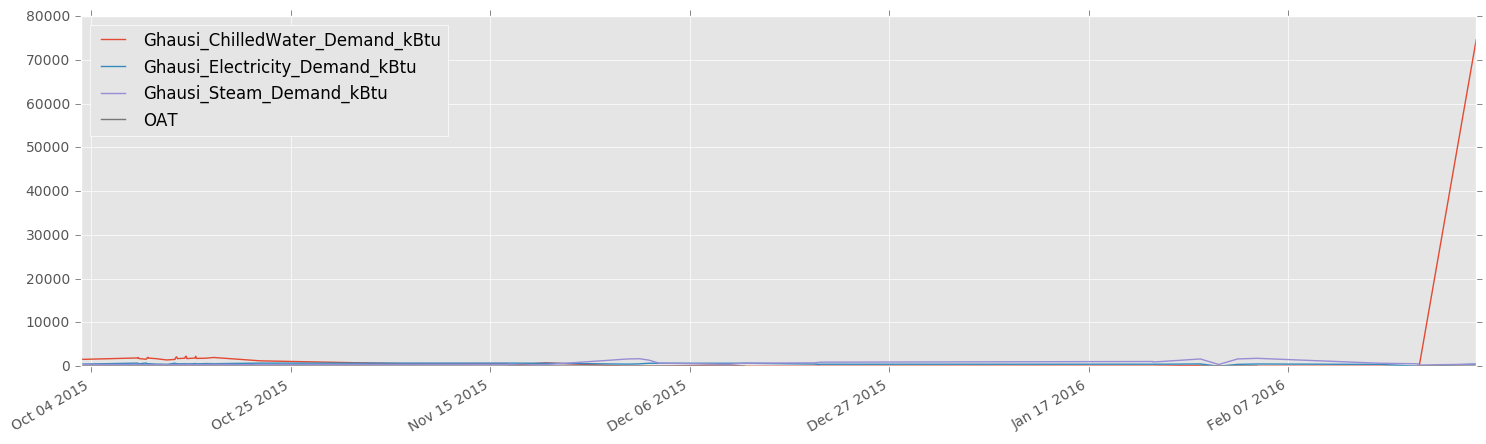

In [14]:
dp.flag_data( runRemoveNA=True,
              
                    removeNAhow="any",
                   
                    runRemoveOutliers=True,

                    sd_val=3,
                   
                    runRemoveOutOfBound=True,
                   
                    low_bound=-10,
                   
                    high_bound=9998 )

print dp.data_raw.shape
print dp.data_cleaned.shape
print dp.data_removed.shape

dp.data_removed.loc[tSlicer,:].plot(figsize=(18,5))

In [15]:
print dp.countNA(dp.data_raw)
print dp.countNA(dp.data_cleaned)

Ghausi_ChilledWater_Demand_kBtu     0
Ghausi_Electricity_Demand_kBtu      0
Ghausi_Steam_Demand_kBtu            0
OAT                                18
dtype: int64
Ghausi_ChilledWater_Demand_kBtu    0
Ghausi_Electricity_Demand_kBtu     0
Ghausi_Steam_Demand_kBtu           0
OAT                                0
dtype: int64


In [16]:
dp.countConstant(dp.data_raw)

Ghausi_ChilledWater_Demand_kBtu    66.323714
Ghausi_Electricity_Demand_kBtu      6.097867
Ghausi_Steam_Demand_kBtu           38.770389
OAT                                22.283563
dtype: float64

# Other pre-processing

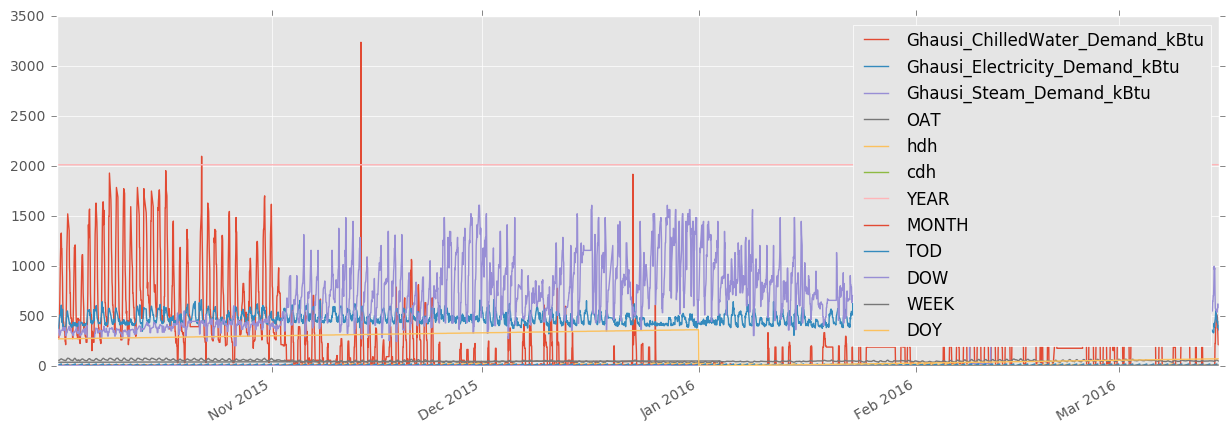

In [17]:
dp.add_degreeDays(dp.data_cleaned)
dp.add_timeFeatures(dp.data_preprocessed)
dp.data_preprocessed.plot(figsize=(15,5))

# Modeling

In [18]:
data= p.get_stream_by_point(['Ghausi_ChilledWater_Demand_kBtu','OAT'],_start="2014",_end="t")#.plot()

<Response [200]>
<Response [200]>


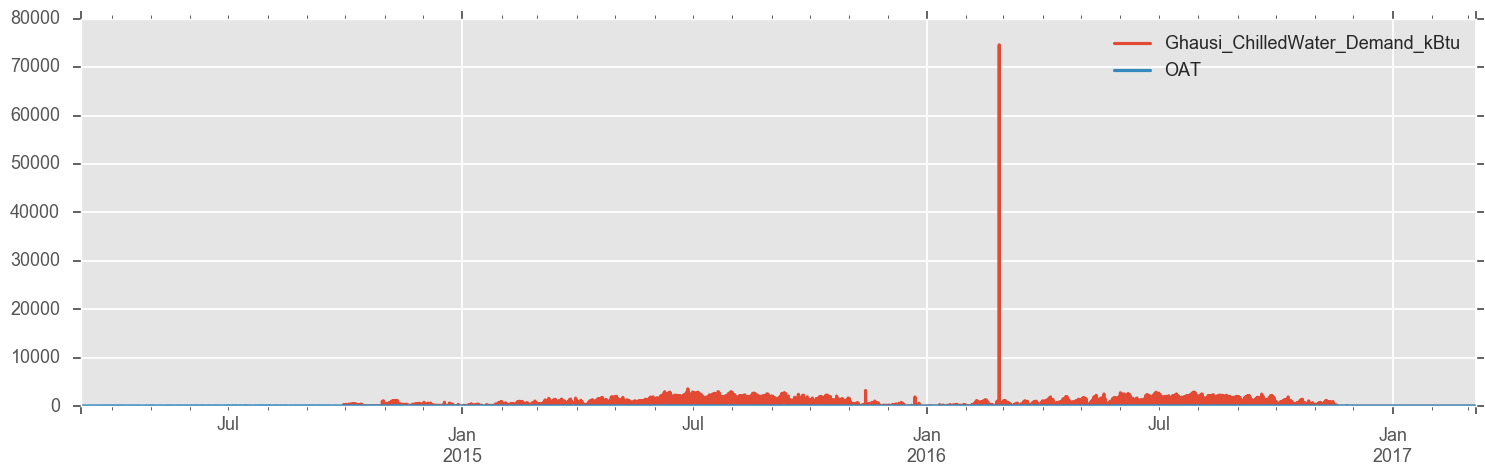

In [38]:
tSlicer=(slice(None))
#tSlicer=(slice("2016-01","2016-02-25"))

data.loc[tSlicer,:].plot(figsize=(18,5))


debugging clean_data
_dataset resampled at 1h
_dataset interpolated with limit of 1 element
_outliers removed


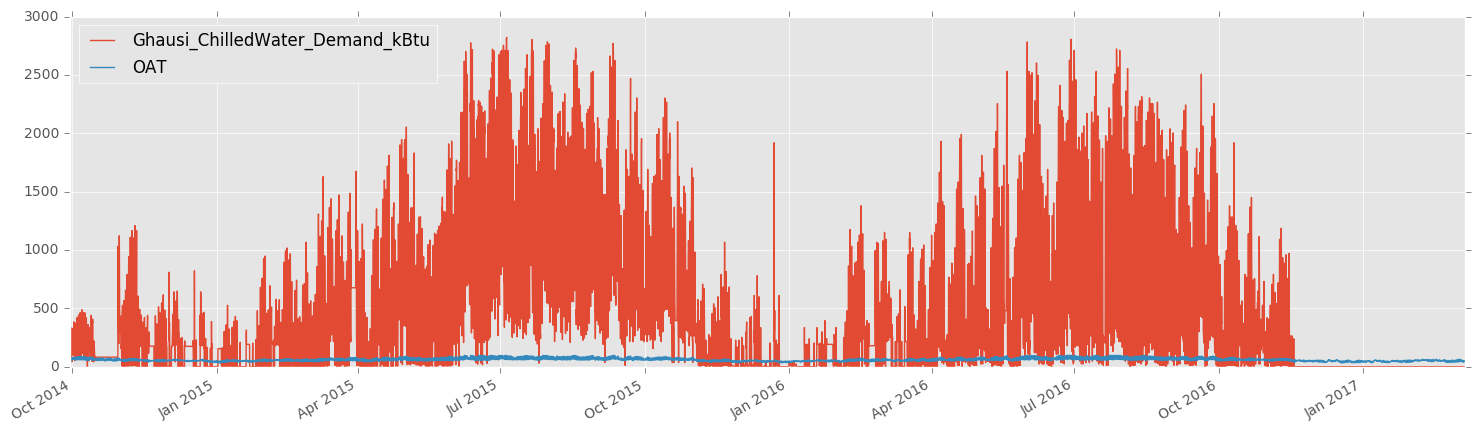

In [20]:
dp=data_preprocessor(data)
dp.clean_data(      runResample=True,

                    freq="1h",                   

                    runInterpolate=True,

                    limit=1,
                   
                    runRemoveNA=False,
              
                    removeNAhow="any",
                   
                    runRemoveOutliers=True,

                    sd_val=3,
                   
                    runRemoveOutOfBound=False,
                   
                    low_bound=100,
                   
                    high_bound=9998
             )
dp.data_cleaned
dp.data_cleaned.plot(figsize=(18,5))

Index([u'Ghausi_ChilledWater_Demand_kBtu', u'OAT', u'hdh', u'cdh', u'YEAR',
       u'MONTH', u'TOD', u'DOW', u'WEEK', u'DOY', u'TOD_0', u'TOD_1', u'TOD_2',
       u'TOD_3', u'TOD_4', u'TOD_5', u'TOD_6', u'TOD_7', u'TOD_8', u'TOD_9',
       u'TOD_10', u'TOD_11', u'TOD_12', u'TOD_13', u'TOD_14', u'TOD_15',
       u'TOD_16', u'TOD_17', u'TOD_18', u'TOD_19', u'TOD_20', u'TOD_21',
       u'TOD_22', u'TOD_23', u'DOW_0', u'DOW_1', u'DOW_2', u'DOW_3', u'DOW_4',
       u'DOW_5', u'DOW_6', u'MONTH_1', u'MONTH_2', u'MONTH_3', u'MONTH_4',
       u'MONTH_5', u'MONTH_6', u'MONTH_7', u'MONTH_8', u'MONTH_9', u'MONTH_10',
       u'MONTH_11', u'MONTH_12'],
      dtype='object')


,Ghausi_ChilledWater_Demand_kBtu,OAT,hdh,cdh,YEAR,MONTH,TOD,DOW,WEEK,DOY,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
2014-09-29 17:00:00,123.474884,61.936424,3.063576,0.000000,2014,9,17,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-29 18:00:00,304.455589,66.882540,0.000000,1.882540,2014,9,18,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-29 19:00:00,225.557118,69.364914,0.000000,4.364914,2014,9,19,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-29 20:00:00,262.396845,71.487335,0.000000,6.487335,2014,9,20,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-29 21:00:00,286.598992,73.570160,0.000000,8.570160,2014,9,21,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-29 22:00:00,338.198792,75.732190,0.000000,10.732190,2014,9,22,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-29 23:00:00,313.617730,75.732190,0.000000,10.732190,2014,9,23,0,40,272,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-30 00:00:00,313.617730,75.732190,0.000000,10.732190,2014,9,0,1,40,273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-30 01:00:00,297.271935,74.670975,0.000000,9.670975,2014,9,1,1,40,273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2014-09-30 02:00:00,297.271935,70.426130,0.000000,5.426130,2014,9,2,1,40,273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


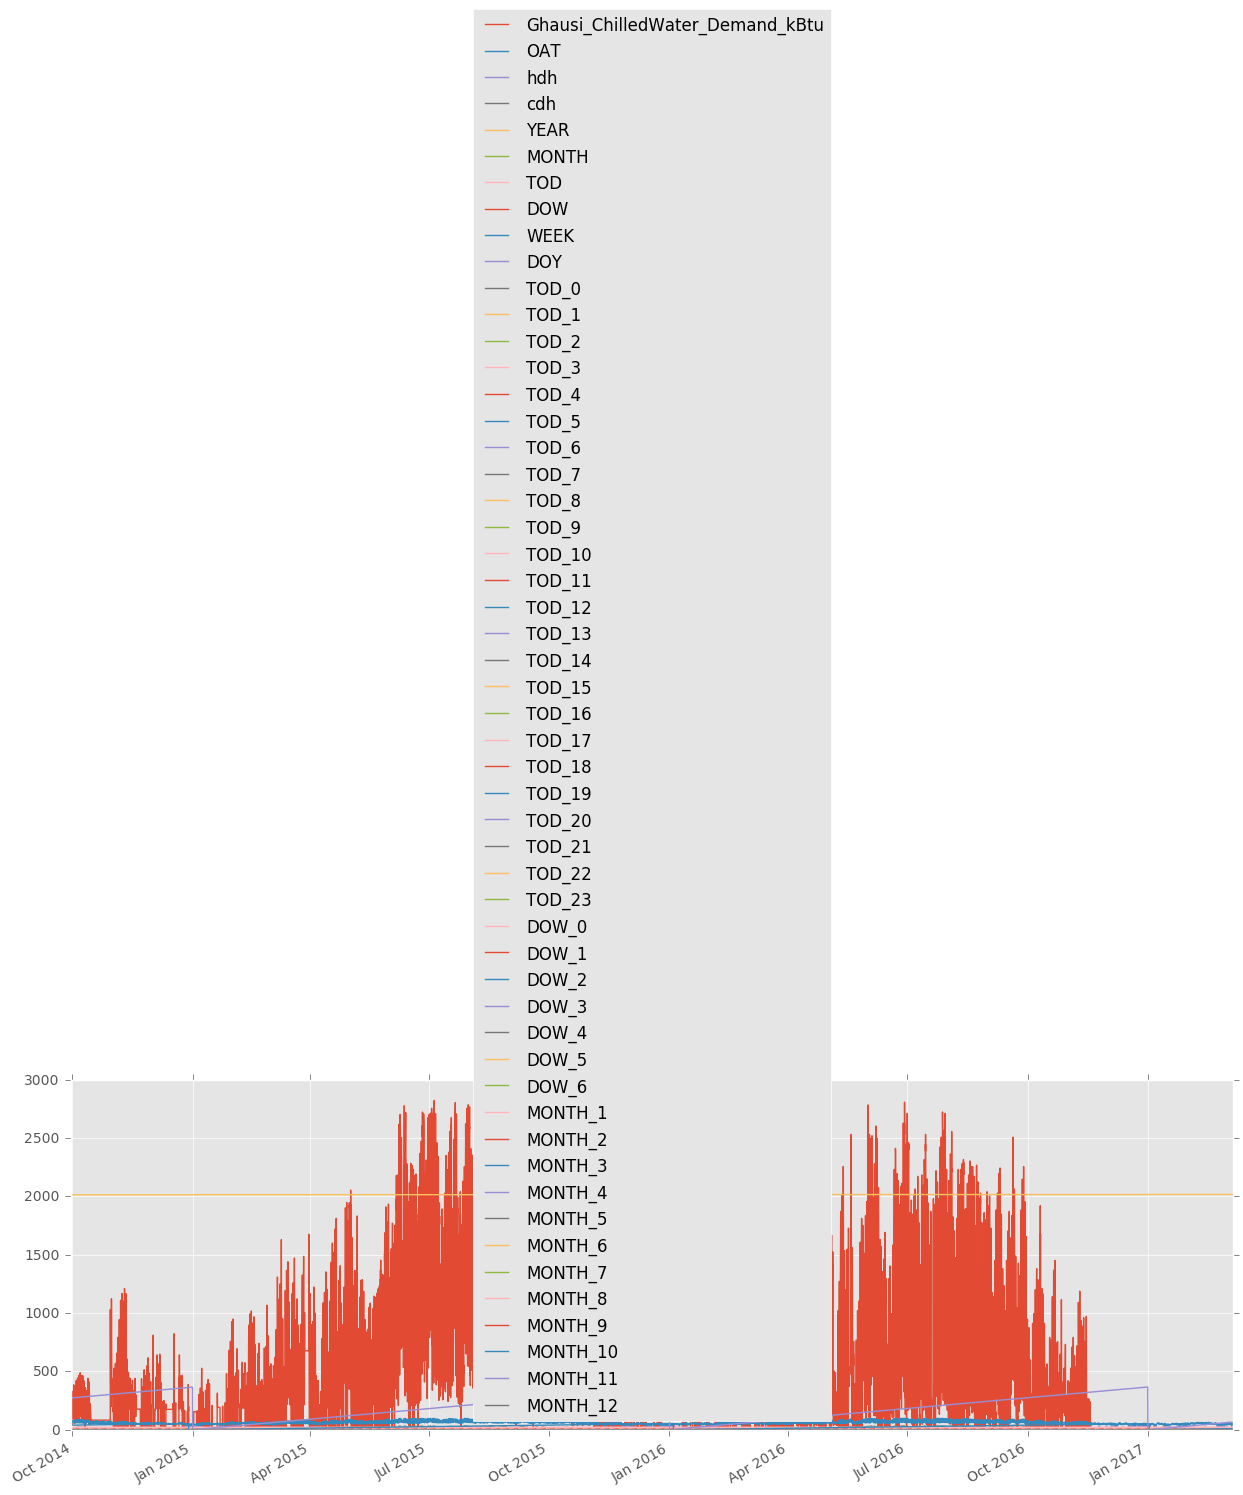

In [21]:
dp.add_degreeDays(dp.data_cleaned)
dp.add_timeFeatures(dp.data_preprocessed)
dp.create_dummies(dp.data_preprocessed, var_to_expand=["TOD","DOW","MONTH"])

print dp.data_preprocessed.columns

dp.data_preprocessed.plot(figsize=(15,5))
dp.data_preprocessed.head(10)

In [22]:
print dp.data_preprocessed.columns

Index([u'Ghausi_ChilledWater_Demand_kBtu', u'OAT', u'hdh', u'cdh', u'YEAR',
       u'MONTH', u'TOD', u'DOW', u'WEEK', u'DOY', u'TOD_0', u'TOD_1', u'TOD_2',
       u'TOD_3', u'TOD_4', u'TOD_5', u'TOD_6', u'TOD_7', u'TOD_8', u'TOD_9',
       u'TOD_10', u'TOD_11', u'TOD_12', u'TOD_13', u'TOD_14', u'TOD_15',
       u'TOD_16', u'TOD_17', u'TOD_18', u'TOD_19', u'TOD_20', u'TOD_21',
       u'TOD_22', u'TOD_23', u'DOW_0', u'DOW_1', u'DOW_2', u'DOW_3', u'DOW_4',
       u'DOW_5', u'DOW_6', u'MONTH_1', u'MONTH_2', u'MONTH_3', u'MONTH_4',
       u'MONTH_5', u'MONTH_6', u'MONTH_7', u'MONTH_8', u'MONTH_9', u'MONTH_10',
       u'MONTH_11', u'MONTH_12'],
      dtype='object')


In [23]:
#(create TMY period)
# 1 filter data periods
# 2 separate datasets
# 3 separate output and input
# 4 train a model
# 5 get scores for the model = validation
# 6 predict
# 7 compare 

from sklearn import svm, cross_validation, linear_model, preprocessing, ensemble
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

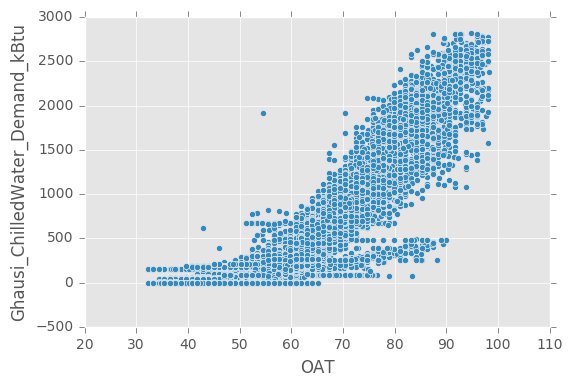

In [24]:
#scatterplot of the data
tSlicer=(slice(None))
#tSlicer=(slice("2016-01","2016-12-31"))
dp.data_preprocessed.loc[tSlicer,:].plot(x="OAT",kind="scatter",y="Ghausi_ChilledWater_Demand_kBtu")

In [25]:
import pandas as pd
"""
Inspired by Paul Raftery Class:
fist prototype

the dataset_type field is to help standardize notation of different datasets:
       'A':'measured pre-retrofit data',
       'B':'pre-retrofit prediction with pre-retrofit model',
       'C':'pre-retrofit prediction with post-retrofit model',
       'D':'measured post-retrofit data',
       'E':'post-retrofit prediction with pre-retrofit model',
       'F':'post-retrofit prediction with pos-tretrofit model',
       'G':'TMY prediction with pre-retrofit model',
       'H':'TMY prediction with post-retrofit model'
typical comparisons used by mave:
    Pre-retrofit model performance = A vs B
    Single model M&V = D vs E
    Post retrofit model performance  = D vs F
    Dual model M&V, normalized to tmy data = G vs H
"""
class DataSet(object):
    def __init__(self, data, 
                 tPeriod1=(slice(None)),
                 tPeriod2=(slice(None)),
                 tPeriod3=(slice(None)),
                 out=[""],
                 inp=[""]
                ):
        
        # the attributes dynamically calcylated using indices and column names
        # first draft duplicates datasets
        #self.baseline1_par={"inpt":{"slicer":(slice(None)), "col":[""]},"outpt":{"slicer":(slice(None)), "col":[""]}}
        #self.baseline1_par={'inpt': {'col': ['OAT'], 'slicer':(slice(None))}, 'outpt': {'col': ['Ghausi_Electricity_Demand_kBtu'], 'slicer':(slice(None))}}
        
        self.fulldata=data
        try:
            self.bs1_in=data.loc[tPeriod1,inp]
        except:
            pass
        
        try:
            self.bs1_out=data.loc[tPeriod1,out]
        except:
            pass                   
                           
        try:
            self.bs2_in=data.loc[tPeriod2,inp]
        except:
            pass                   
        
        try:
            self.bs2_out=data.loc[tPeriod2,out]
        except:
            pass                   
        
        try:
            self.eval_in=data.loc[tPeriod3,inp]
        except:
            pass                   

        try:
            self.eval_out=data.loc[tPeriod3,out]
        except:
            pass                   
       

    def set_dataset(baseline_type, date_slicer, inpt, outpt):
        
        # need to develop a method to update stuff
        
        
        
        return
        
    def get_dataset(baseline_type, date_slicer, inpt_outpt):
        
        
        
        #ret=self.self.fulldata.loc[]
        
        return

In [26]:
#Mocked input interface
# select streams
Building = "Ghausi"
Commodity = "Chilled_Water"

# Baseline period 1 
tPeriod1=(slice("2014-01","2014-12"))

# Baseline period 2 
tPeriod2=(slice("2015-01","2015-12"))

# Evaluation period 3 
tPeriod3=(slice("2016-01","2016-12"))

#Model Type
mod = linear_model.LinearRegression()

#Model variables
out= ["Ghausi_ChilledWater_Demand_kBtu"]
inp= ['hdh', 'cdh', u'TOD_0', u'TOD_1', u'TOD_2',
       u'TOD_3', u'TOD_4', u'TOD_5', u'TOD_6', u'TOD_7', u'TOD_8', u'TOD_9',
       u'TOD_10', u'TOD_11', u'TOD_12', u'TOD_13', u'TOD_14', u'TOD_15',
       u'TOD_16', u'TOD_17', u'TOD_18', u'TOD_19', u'TOD_20', u'TOD_21',
       u'TOD_22', u'TOD_23', u'DOW_0', u'DOW_1', u'DOW_2', u'DOW_3', u'DOW_4',
       u'DOW_5', u'DOW_6', u'MONTH_1', u'MONTH_2', u'MONTH_3', u'MONTH_4',
       u'MONTH_5', u'MONTH_6', u'MONTH_7', u'MONTH_8', u'MONTH_9', u'MONTH_10',
       u'MONTH_11', u'MONTH_12']


### warn how much data is missing or when things start/end

In [27]:
dt=DataSet(dp.data_preprocessed,
           tPeriod1,
           tPeriod2,
           tPeriod3,
           out,
           inp
          )

In [28]:
mod_coeff=mod.fit(dt.bs2_in,dt.bs2_out) # output, input in np arrays

In [29]:
mod_coeff.score(dt.bs2_in.values,dt.bs2_out.values)    

0.93042291005194555

In [30]:
mod_coeff.predict(dt.bs2_in.values)

array([[ 238.02734375],
       [  80.28515625],
       [  42.8828125 ],
       ..., 
       [ 160.25      ],
       [ 182.7578125 ],
       [ 192.109375  ]])

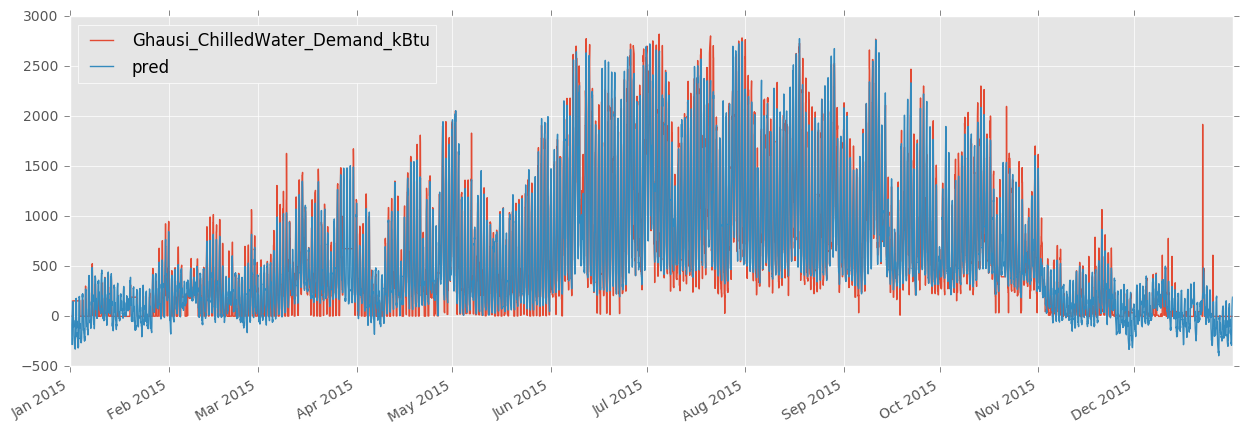

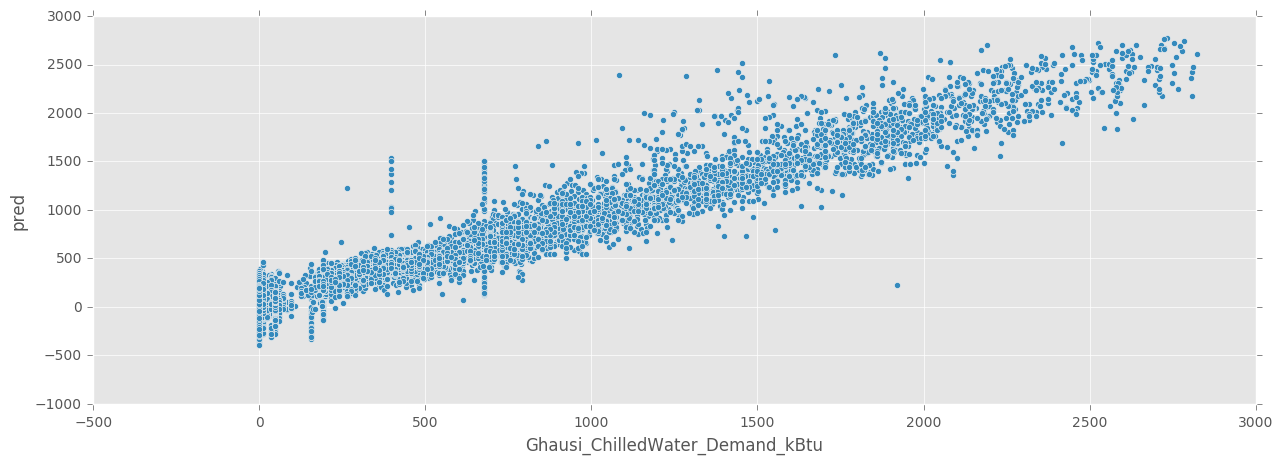

In [31]:
temp=dt.bs2_out
temp["pred"]=mod_coeff.predict(dt.bs2_in.values)

temp.plot(figsize=(15,5))
temp.plot(kind="scatter",x="Ghausi_ChilledWater_Demand_kBtu",y="pred",figsize=(15,5))


In [34]:
"""
To do:
Modeling
- add non lin model (random forest regression)
- remove negative val in model
- cal scores
- calc savings
- plots
- uncertainty
- kfold cross-validation
- add rescaling of features (preprocessing)

- metrics/KPI calculator function

"""

'\nTo do:\nModeling\n- add non lin model (random forest regression)\n- remove negative val in model\n- cal scores\n- calc savings\n- plots\n- uncertainty\n- kfold cross-validation\n- add rescaling of features (preprocessing)\n\n- metrics/KPI calculator function\n\n'

In [42]:
"""
This class plots the data

"""
import pandas as pd
import os
import requests as req
import json
import numpy as np
import datetime

from matplotlib import style
import matplotlib
%matplotlib inline
style.use('ggplot')

from matplotlib.pyplot import cm 

class Plotter(object):


    # data manipulation methods
    
    def unstack_():
        return
    
    def add_timeColumn(self,data, timecol):
        
        # need to be more flexible, this is a placeholder
        if isinstance(timecol, list):
            for elem in timecol:
                
                if elem=="TOD":
                    
                
                    data[elem]=data.index.hour
                
                elif elem=="YR-MO":
                    
                    year=pd.Series(data.index.year, index=data.index)
                    month=pd.Series(data.index.month,index=data.index).map("{:02}".format)
                    data.loc[:,elem]=(year.astype(str) +"-" + (month.astype(str)))
        
        return data

    def filterWeekDay(self,data):
        return data[(data.index.weekday <5)]
        # data.index.weekday == 0 is Monday 
        # data.index.weekday == 6 is Sunday 
    
    def filterWeekEnd(self,data):
        return data[((data.index.weekday > 4)&(data.index.weekday <=6))]
        # data.index.weekday == 0 is Monday 
        # data.index.weekday == 6 is Sunday 
    
    # plotting methods: 1- LineCharts
    
    def plot_energy_profile_byMo (self,
                                  data,
                                  start_, 
                                  end_, 
                                  var):
        # daily energy profile by Month (each line is an avergage month)
        # 1. select rows (time interval) and columns (variable)
        tSlicer=(slice(start_,end_))
        data=pd.DataFrame(data.loc[tSlicer,var])
        
        # 2. add time columns
        data=self.add_timeColumn(data, ["TOD","YR-MO"])
        
        # 3. reshape unstacking
        data_unstacked=data.groupby(["TOD","YR-MO"]).mean().unstack()
        
        # 4. format plot
        n=len(data_unstacked.columns)
        color=cm.rainbow(np.linspace(0,1,n))
        
        # 5. plot
        data_unstacked.plot(figsize=(15,5),label=var, color=color, title=var,ylim=[0,data_unstacked.max().max()*1.1])
        
        return
        
        
    # plotting methods: 2- ScatterPlots
              
    def plot_scatter_WD_WE (self,
                    data, 
                    start_, 
                    end_, 
                    var_out,
                    var_in):
        
        # 1. select rows (time interval) and columns (variable)
        tSlicer=(slice(start_,end_))
        data=pd.DataFrame(data.loc[tSlicer,[var_in,var_out]])

        # 2. setup plots
        fig, ax = plt.subplots()

        # 3. select/plot WD

        WD_data=self.filterWeekDay(data)
        WD_data.loc[tSlicer, :].plot(figsize=(18,5), kind="scatter", x=var_in,y=var_out,
                                     label='WeekDay', color='r', ax=ax).set_title(var_out+" Week Days");

        # 4. select/plot WE

        WE_data=self.filterWeekEnd(data)
        WE_data.loc[tSlicer, :].plot(figsize=(18,5), kind="scatter", x=var_in,y=var_out,
                                     label='WeekEnd', color='g', ax=ax).set_title(var_out+" Week Days");
            
        return


    
### need to rewrite after this

    def plot_scatter_Per1vsPer2 (self,
                      data_per1,
                      data_per2,
                      var_out,
                      var_in,
                      var_out2=None,
                      var_in2=None      
                                ):
        
#        if var_in2:
        var_in2=var_in

#        if var_out2:
        var_out2=var_out
        
        # this method assumes the datasets are already separated and sliced in time
        # it also assumes the two in/out variables have the same name

        # 2. setup plots
        fig, ax = plt.subplots()

        # 3. plot per1

        data_per1.plot(figsize=(18,5), kind="scatter", x=var_in,y=var_out,
                                     label='Period 1', color='r', ax=ax).set_title(var_out+" Period 1");

        # 4. plot per2

        WE_data.plot(figsize=(18,5), kind="scatter", x=var_in2,y=var_out2,
                                     label='WeekEnd', color='g', ax=ax).set_title(var_out+" Week Days");
            
 
        return

    def plot_compare (self,
                      compare_data,
                      plot_start,
                      plot_end):
        compare_data.loc[plot_start:plot_end,:].plot(figsize=(15,5),title=tar)#.set_title("month = %d" %month)  
        plt.show() 

    def plot_PrePost_byMo (self,
                           data, 
                           tar):
        last_mo=data[data["PrePost"]==1].index.max().month
        temp=data.groupby(["MONTH","YEAR"])[tar].mean().unstack()
        temp[(temp.index<=last_mo)].plot(figsize=(15,5), kind="bar",title=tar)
        plt.show()

    def plot_ModPost_byMo (self,
                           compare_sav, 
                           tar):
        cols=["target_predicted", "target_actual"]
        compare_sav = compare_sav.ix[:, cols]
        compare_sav.groupby(compare_sav.index.month).mean().plot(figsize=(15,5), kind="bar",title=tar)
        plt.show()

    def plot_PrePostSav_byMo(self,
                             data, 
                             tar):
        last_mo=data[data["PrePost"]==1].index.max().month
        temp=data.groupby(["MONTH","YEAR"])[tar].mean().unstack()
        (temp[(temp.index<=last_mo)].diff(axis=1)*(-1)).plot(figsize=(15,5), kind="bar",title=tar)
        plt.show()

    def plot_ModPostSav_byMo(self,
                             compare_sav, 
                             tar):
        cols=["target_predicted", "target_actual"]
        compare_sav = compare_sav.ix[:, cols]
        (compare_sav.groupby(compare_sav.index.month).mean().diff(axis=1)*(-1)).plot(figsize=(15,5), kind="bar",title=tar)
        plt.show() 
        
        
    # plotting methods: 3- BarCharts
    
    
    
    # plotting methods: 4- BoxPlot

    
    
    # plotting methods: 5- Heat Mapsd



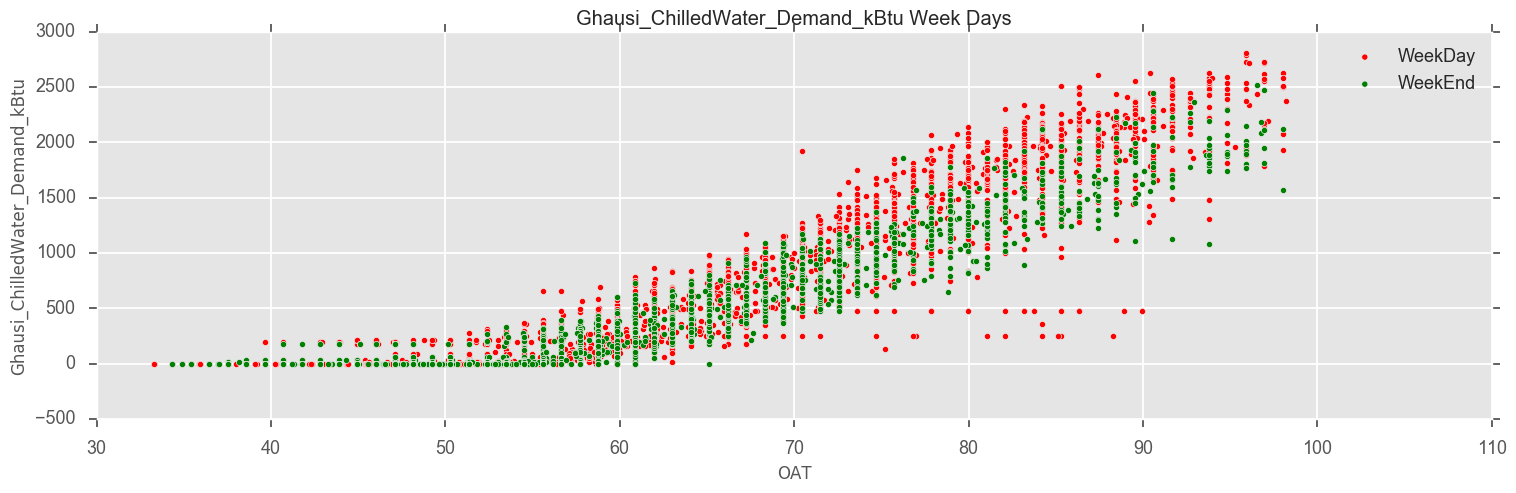

In [43]:
Pl=Plotter()
Pl.plot_scatter_WD_WE(dt.fulldata,"2016-01","2016-12","Ghausi_ChilledWater_Demand_kBtu","OAT")

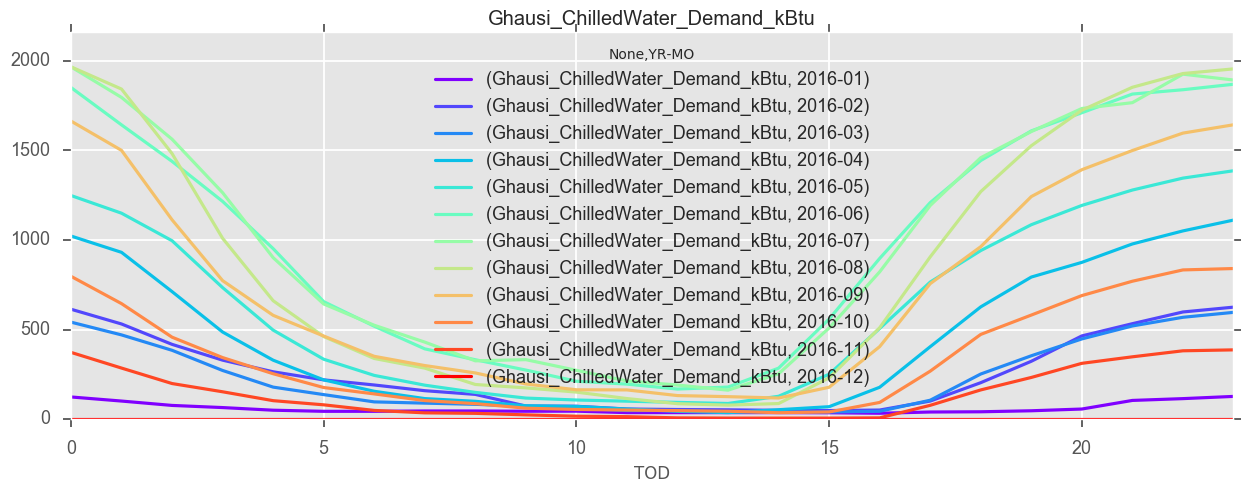

In [39]:
Pl=Plotter()
Pl.plot_energy_profile_byMo(dt.fulldata,"2016-01","2016-12","Ghausi_ChilledWater_Demand_kBtu")